In [2]:
import plantuml
from IPython.display import SVG, display
import requests


def show_plant(txt):
    plnt_txt = plantuml.deflate_and_encode(txt)
    uri = "http://www.plantuml.com/plantuml/svg/" + plnt_txt
    htmldata = requests.get(uri)
    svg_txt = htmldata.text
    style_idx = svg_txt.find("style=") + len("style=") + 1
    svg_txt = svg_txt[:style_idx]+"background-color: white;"+svg_txt[style_idx:]
    display(SVG(svg_txt))

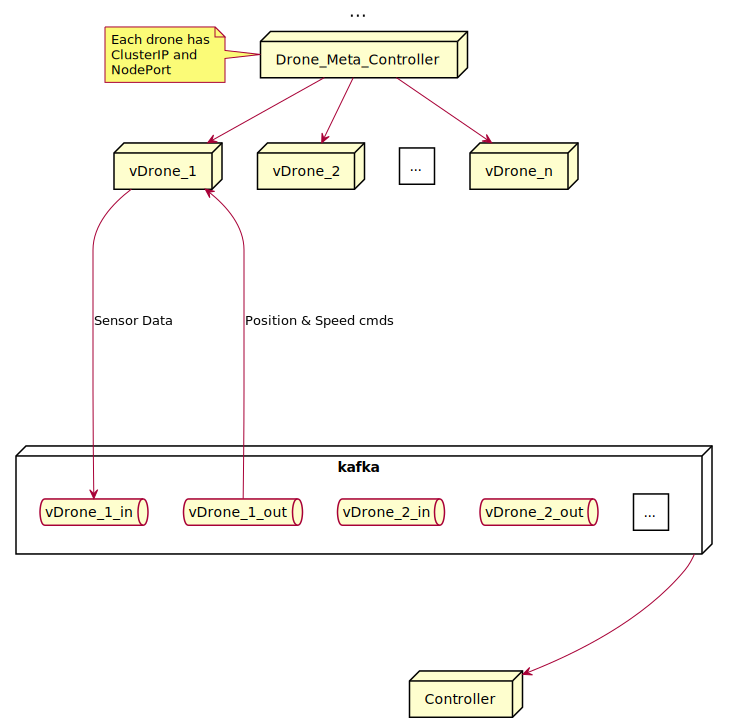

In [108]:

txt = """
title ...
' skinparam handwritten true
top to bottom direction
'skinparam monochrome true
'skinparam shadowing<<no_shadow>> false
skinparam shadowing false

hide stereotype

skinparam rectangle<<desc>> {
    backgroundColor Transparent
    borderColor Transparent
    titleFontColor Transparent
    stereotypeFontColor Transparent
    ArtifactStereotypeFontColor Transparent
    ArtifactStereotypeFontSize 10
}

node Drone_Meta_Controller
note left
    Each drone has
    ClusterIP and
    NodePort
end note

node vDrone_1
node vDrone_2
node vDrone_n
rectangle multiple<<desc>>  #White/White [
...]


Drone_Meta_Controller -d-> vDrone_1
Drone_Meta_Controller -d-> vDrone_2
Drone_Meta_Controller -[hidden]d-> multiple
Drone_Meta_Controller -d-> vDrone_n
vDrone_n -[hidden]l-> multiple
multiple -[hidden]l-> vDrone_2
vDrone_2 -[hidden]l-> vDrone_1


node kafka {
    queue vDrone_1_in
    queue vDrone_1_out
    queue vDrone_2_in
    queue vDrone_2_out
    rectangle kafka_multiple<<desc>>  #White/White [
...]
}

kafka_multiple -[hidden]l-> vDrone_2_out
vDrone_2_out -[hidden]l-> vDrone_2_in
vDrone_2_in -[hidden]l-> vDrone_1_out
vDrone_1_out -[hidden]l-> vDrone_1_in

vDrone_1 ----d-> vDrone_1_in : Sensor Data
vDrone_1_out ----d-> vDrone_1 : Position & Speed cmds


node Controller

vDrone_1_in --[hidden]d-> Controller
kafka --d-> Controller

 """


show_plant(txt)





